## Importance Sampling 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import uniform

The expected value of the variable x is : $$ E[x] = \sum_{i=1}^n p(x_i)  x_i  $$

Let's suppose that we have the following distribution of a dice where for each realistation of $x_i$ we have: $$ f(x_i) = \frac{1}{6} $$

Where the expected value is :

$$ E_{f}[x] = \sum_{i=1}^n x_i * f(x_i) = \frac {1}{n}\sum_{i=1}^n x_i $$




In [3]:
## Let's build the probabilities

x = np.array(range(1,7))

p = 1/6 

p_x = np.repeat(p,6)


Expected value of the unbiaced dice:  3.5


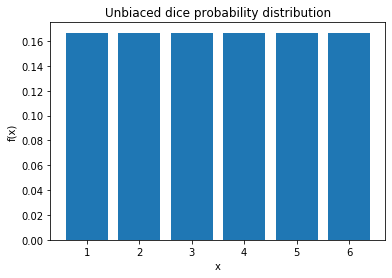

In [40]:
## Plot the weighted probabilities 

plt.bar(x,p)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title("Unbiaced dice probability distribution")

## Compute the expected value

mean_unbiased_dice = np.sum(p_x * x)

print("Expected value of the unbiaced dice: ", mean_unbiased_dice)


Now let's suppose that we have a different biased dice with the following probabilities $g(x)$: 

$$ p(x = 1) = \frac{3}{6} $$
$$ p(x = 2) = \frac{1}{6} $$
$$ p(x = 3) = \frac{.5}{6} $$
$$ p(x = 4) = \frac{.5}{6} $$
$$ p(x = 5) = \frac{.5}{6} $$
$$ p(x = 6 ) = \frac{.5}{6} $$

Hence, the expected value is :

$$ E_g[x] = \sum_{i=1}^n x_i * g(x_i)  $$





In [7]:
## Let's build the probabilities
p_x_w = (3/6,1/6,.5/6,.5/6,.5/6,.5/6)

Expected value of the biased dice:  2.333333333333333


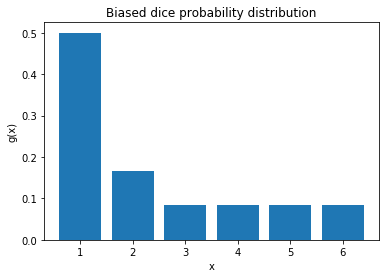

In [61]:
## Plot the weighted probabilities 

plt.bar(x,p_x_w)
plt.ylabel('g(x)')
plt.xlabel('x')
plt.title("Biased dice probability distribution")

## Compute the expected value

mean_biased_dice = np.sum(p_x_w * x)

print("Expected value of the biased dice: ", mean_biased_dice)


First, let's simulate the random rolling of the unbaised dice for n trails

In [63]:
##Let's verify how it will converge to the expected value 3.5

## This is the function to compute the expected value 

def exp_value(n):
    
    """
    
        Estimates the expected value of the probability of rolling a unbaised dice n times
        
        Inputs:
            n: number of experiments
        
        Returns:
            trails: [1xn] vector with the numbering of n experiments realized
            expected_value: [1xn] vector with the expected value for the n experiment realized
            
    """
    
    
    trails = []
    
    expected_value = []

    total = 0

    for i in range(0,n):

        value = random.randint(1,6)

        total += value

        n = (i+1)
        
        exp = total/n
        
        expected_value.append(exp)
        
        trails.append(n)

        #expected_value[0][i] = total/n
        
    return trails, expected_value



Text(0.5, 1.0, ' Expected value of rolling an unbaised n times')

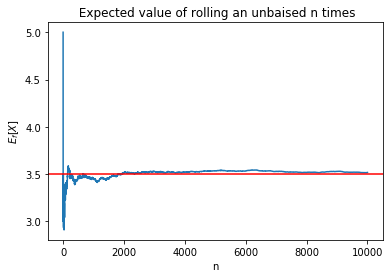

In [64]:
## Lets roll the dice for n times

y = exp_value(10000)


plt.plot(y[0], y[1])
plt.axhline(y=3.5, color='r', linestyle='-')
plt.ylabel('$E_f[X]$')
plt.xlabel('n')
plt.title(" Expected value of rolling an unbaised n times")


Now let's suppose that we want to approximate the probability of the biased dice, having only access to the fair dice. We can use importance sampling to solve the problem and this is the proof:

$$E_g[x] = \sum_{i=1}^n x_i * g(x_i) =  \sum_{i=1}^n {x_i} \frac{g(x_i)}{f(x_i)} * f(x_i) = \frac{1}{n} \sum_{i=1}^n {x_i} * \frac{g(x_i)}{f(x_i)} =  E_f\left[x * \frac{g(x)}{f(x)}\right] $$

For this we need to compute the weighting ratio $\frac{g(x_i)}{f(x_i)}$

In [70]:
## Vector with the weighted probabilities

weighting_ratio = p_x_w/p_x

Text(0.5, 1.0, 'Probabilities using the weighted ratio')

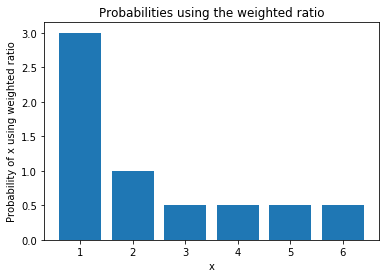

In [69]:
## Plot the weighted ratios probabilities

plt.bar(x,weighting_ratio)
plt.ylabel('Probability of x using weighted ratio')
plt.xlabel('x')
plt.title("Probabilities using the weighted ratio")

In [71]:
## Let's build the importance sampling function

def importance_sampling(n):
    
    """

        Estimates the expected value of the probability of rolling a baised dice n times using importance sampling

        Inputs:
            n: number of experiments

        Returns:
            importance_trails: [1xn] vector with the numbering of n experiments realized
            importance_expected_value: [1xn] vector with the expected value for the n experiments realized

    """
      
    importance_trails = []

    importance_expected_value = []

    total = 0

    for i in range(0,n):

        ## Fist we roll the unbiased dice, I.e., from f(x)

        value = random.randint(1,6)

        ## Multiply the value by its respective weighting g(x)/f(x)

        weighted_value = weighting_ratio[value-1] * value
        
        total += weighted_value
        
        n = (i+1)
        
        exp = total/n
        
        importance_expected_value.append(exp)
        
        importance_trails.append(n)
        
    return importance_trails, importance_expected_value
        




Text(0.5, 1.0, 'Use importance sampling to approximate the expected value of the biased dice')

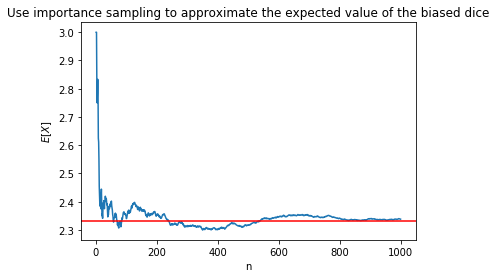

In [72]:
## Lets roll the dice for n times

y = importance_sampling(1000)

plt.plot(y[0], y[1])
plt.axhline(y=mean_biased_dice, color='r', linestyle='-')
plt.ylabel('$E[X]$')
plt.xlabel('n')
plt.title("Use importance sampling to approximate the expected value of the biased dice")

